In [1]:
import sys
sys.path.append('../')
from read_data_functions import *
from plot_functions import *
from calculations import *
plt.style.use('../Style.mplstyle')
import warnings
warnings.filterwarnings('ignore')
pd.options.mode.chained_assignment = None  # suppress warnings

In [2]:
parent_path = '../../../Data/2026/'
paths = ['260113_Vanillin_gas_particle_UV/', '260115_vanillin+UV_20C/', '260116_vanillin70ppb_AP70ppb_UV_20C/']
save_path = 'Figures/Initial_exp_comparison/'
timestamps = [['2026-01-13 13:21', '2026-01-13 18:42'],
              ['2026-01-15 09:49', '2026-01-15 17:25'],
              ['2026-01-16 11:09', '2026-01-16 17:56']]
t_zeros = ['2026-01-13 14:36', '2026-01-15 11:10', '2026-01-16 12:44']

SMPS = {}
AMS = {}
DAQ = {}
for path in paths:
    temp_smps = import_SMPS(f'{parent_path}{path}SMPS/', '', 0)
    temp_ams = import_data(f'{parent_path}{path}AMS/', '', 't_series', '%d-%m-%Y %H:%M:%S', 0)
    temp_daq = import_data(f'{parent_path}{path}DAQ/', '', 'DAQ_Timestamp_UTC', '%d-%m-%Y %H:%M:%S', 0)
    for key in temp_smps.keys():
        temp_smps[key].rename(columns = {temp_smps[key].keys()[38]:'Total concentration'}, inplace = True)
        SMPS[key] = temp_smps[key]
    for key in temp_ams.keys():
        if 'PToF' not in key:
            temp_ams[key].columns = ['t_series', 'HROrg', 'HRNO3', 'HRSO4', 'HRNH4', 'HRChl', 'Ratio_H_C', 'Ratio_O_C', 
                                     'familyCHN', 'familyCHO1', 'familyCHO1N', 'familyCH', 'f43', 'f44', 'Time']
            AMS[key] = temp_ams[key]
    for key in temp_daq.keys():
        DAQ[key] = temp_daq[key]

mask = AMS['260115_AMS_vanillin+UV_TS']['HROrg'] != 0
AMS['260115_AMS_vanillin+UV_TS'] = AMS['260115_AMS_vanillin+UV_TS'][mask]

SMPS_keys = ['260113-vanillin_mass', '260113-vanillin_number', '260115-vanillin+UV_mass', '260115-vanillin+UV_number', 
             '260116_vanillin+apinene+UV_mass', '260116_vanillin+apinene+UV_number']
AMS_keys = ['260113_AMS_vanillin+UV_TS', '260115_AMS_vanillin+UV_TS', '260116_AMS_vanillin+apinine+UV_TS']
DAQ_keys = ['DataDAQ_260113', 'DataDAQ_260115', 'DataDAQ_260116']

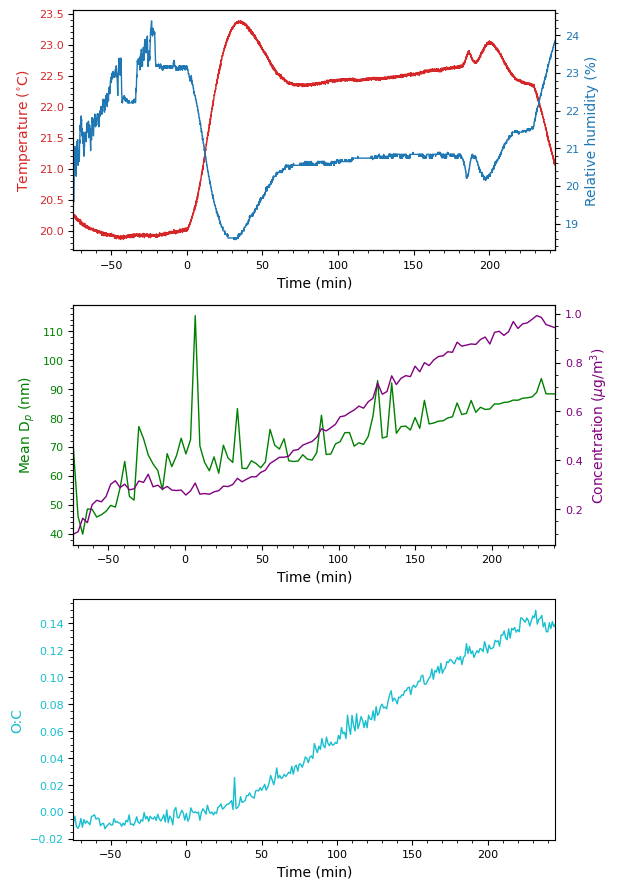

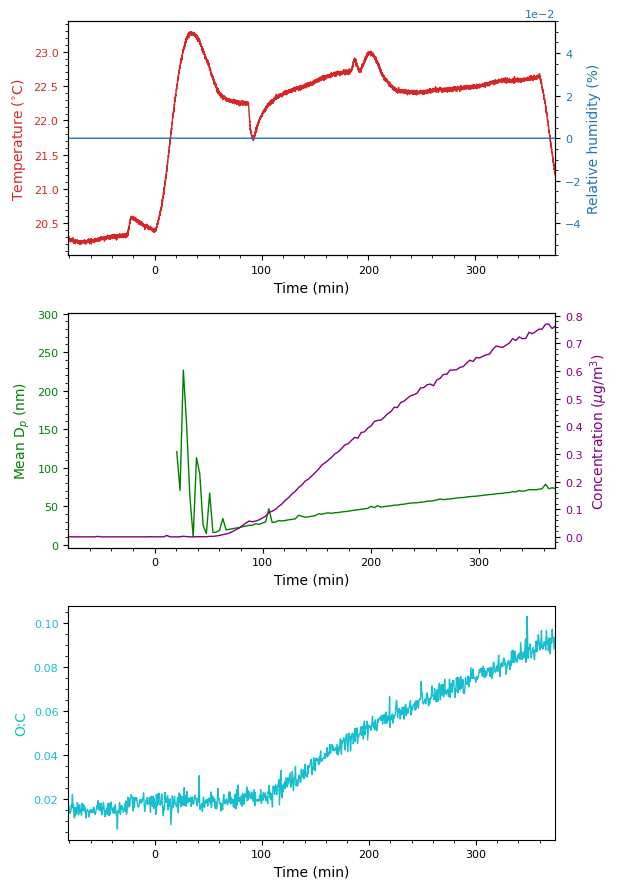

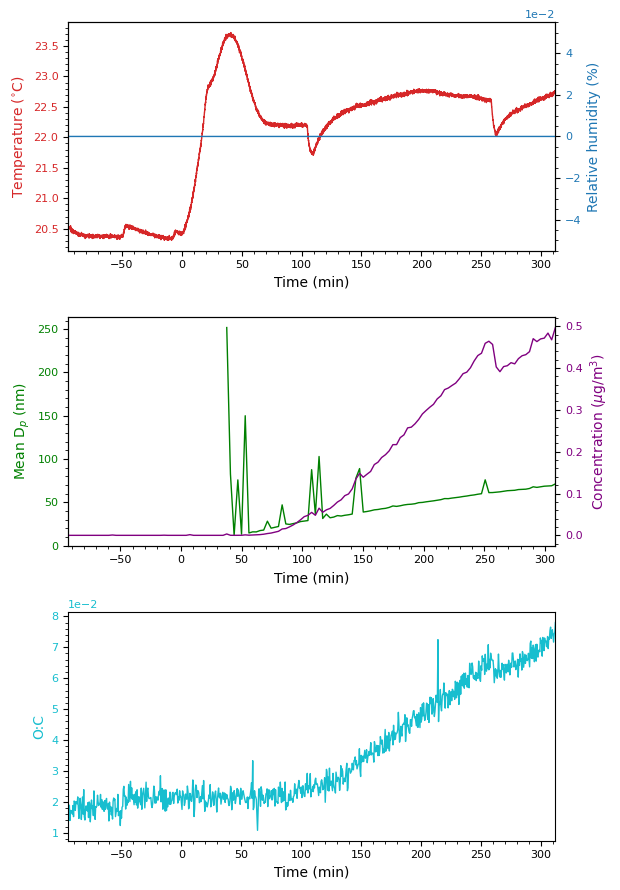

In [3]:
for i, key in enumerate(SMPS_keys[::2]):
    plot_AURA_overview(DAQ[DAQ_keys[i]], SMPS[key], AMS[AMS_keys[i]], timestamps[i], t_zeros[i], save_path)